spectrum loaded!


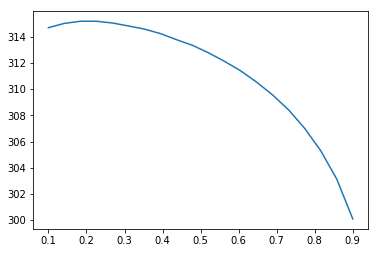

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pypvcell.solarcell import SQCell
from pypvcell.illumination import Illumination
from pcsc_util import calc_tp

In [7]:
def eta_s(ill):
    """
    A function that calculates the efficiency of the silicon cell
    """
    band_gap=1.1
    sqcell=SQCell(band_gap,300)
    sqcell.set_input_spectrum(ill)
    
    return sqcell.get_eta()

def eta_3(ill):
    """
    A function that calculates the efficiency of the III-V solar cell from given spectrum
    """
    
    band_gap=1.7
    sqcell=SQCell(band_gap,300)
    sqcell.set_input_spectrum(ill)
    
    return sqcell.get_eta()

def calc_cp(total_area,c_3,c_s,a_3,a_s):
    
    return total_area*(a_s*c_s+a_3*c_3)

def no_bot_cell(ill):
    return 0

In [8]:
std_ill=Illumination("AM1.5g",concentration=1)

Test case 1: III-V area is smaller than concentrated area

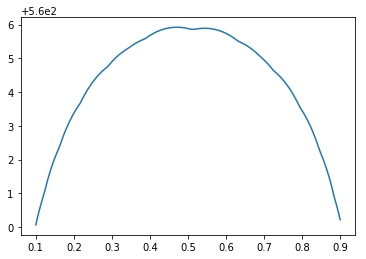

In [9]:
a_3=1 #III-V cell area
a_c=0.01 #concentrated sunlight area
f_c_arr=np.linspace(0.1,0.9,num=200)

tp_arr=[]
for f in f_c_arr:
    tp=calc_tp(std_ill,1,a_3=a_3,a_c=a_c,f_c=f,eta_s=no_bot_cell,eta_3=eta_3)
    tp_arr.append(tp)

tp_arr=np.array(tp_arr)

plt.plot(f_c_arr,tp_arr)
plt.show()

Test case 2: III-V area is larger than the concentrated area

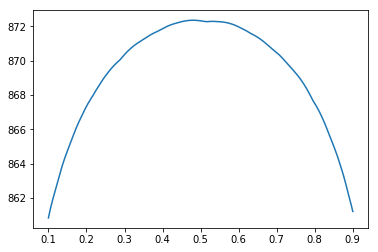

In [5]:
a_3=1 #III-V cell area
a_c=0.01 #concentrated sunlight area
f_c_arr=np.linspace(0.1,0.9,num=200)

tp_arr=[]
for f in f_c_arr:
    tp=calc_tp(std_ill,1,a_3=a_3,a_c=a_c,f_c=f,eta_s=eta_s,eta_3=eta_3)
    tp_arr.append(tp)

tp_arr=np.array(tp_arr)

plt.plot(f_c_arr,tp_arr)
plt.show()

Note that 